In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [31]:
imagePaths = 'DATASET/'
label_list = ['daun kemangi', 'daun pepaya']
data = []
labels = []

In [32]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
    #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [33]:
np.array(data).shape

(86, 32, 32, 3)

In [34]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [35]:
print(labels)

['daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi'
 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun kemangi' 'daun pepaya'
 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya'
 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya'
 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya'
 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya'
 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya'
 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya' 'daun pepaya'
 'daun pepa

In [36]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


In [37]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [38]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (68, 32, 32, 3)
Ukuran data test = (18, 32, 32, 3)


In [39]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [41]:
# tentukan hyperparameter\n",
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [42]:
# compile arsitektur yang telah dibuat\n",
model.compile(loss = 'binary_crossentropy',
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [43]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
            epochs=max_epochs, batch_size=32)


Epoch 1/100
3/3 [==============================] - 1s 124ms/step - loss: 0.9008 - accuracy: 0.4853 - val_loss: 1.3235 - val_accuracy: 0.3889
Epoch 2/100
3/3 [==============================] - 0s 53ms/step - loss: 0.8612 - accuracy: 0.5294 - val_loss: 0.9102 - val_accuracy: 0.6111
Epoch 3/100
3/3 [==============================] - 0s 46ms/step - loss: 0.9356 - accuracy: 0.4853 - val_loss: 0.3639 - val_accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 48ms/step - loss: 0.4064 - accuracy: 0.8971 - val_loss: 0.4948 - val_accuracy: 0.6111
Epoch 5/100
3/3 [==============================] - 0s 44ms/step - loss: 0.4456 - accuracy: 0.8529 - val_loss: 0.2574 - val_accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 53ms/step - loss: 0.2542 - accuracy: 0.9853 - val_loss: 0.2297 - val_accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 45ms/step - loss: 0.2395 - accuracy: 0.9559 - val_loss: 0.2767 - val_accuracy: 0.9444
Epoch 8/100
3/3 [==

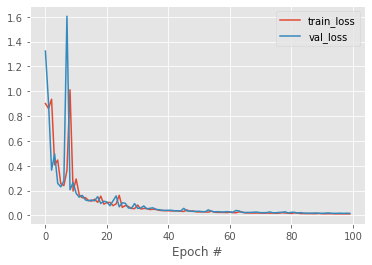

In [44]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [45]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))


              precision    recall  f1-score   support

daun kemangi       1.00      1.00      1.00         7
 daun pepaya       1.00      1.00      1.00        11

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [ ]:
# uji model menggunakan image lain
queryPath = imagePaths+'042.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0
q_pred = model.predict(q)
print(q_pred)

In [ ]:
if q_pred<=0.5 :
    target = "daun kemangi"
else :
    target = "daun pepaya"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
# menampilkan output image
cv2_imshow(output)